In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1028,2020-07-18,United Kingdom,293472.0,293239.0,45252.0,45233.0,233.0,19.0
1029,2020-07-18,Germany,201420.0,201372.0,9097.0,9083.0,48.0,14.0
1030,2020-07-18,Iran,270411.0,269440.0,13783.0,13791.0,971.0,-8.0
1031,2020-07-18,Turkey,217785.0,217799.0,5456.0,5458.0,-14.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3002.3059051306873
RMSE =  7477.074915458873


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.9535333978703
RMSE =  686.6292204315482


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  15367.31
RMSE =  20058.249080365913
-- World performances for deaths --
MAE =  1530.32
RMSE =  1869.1196697911025


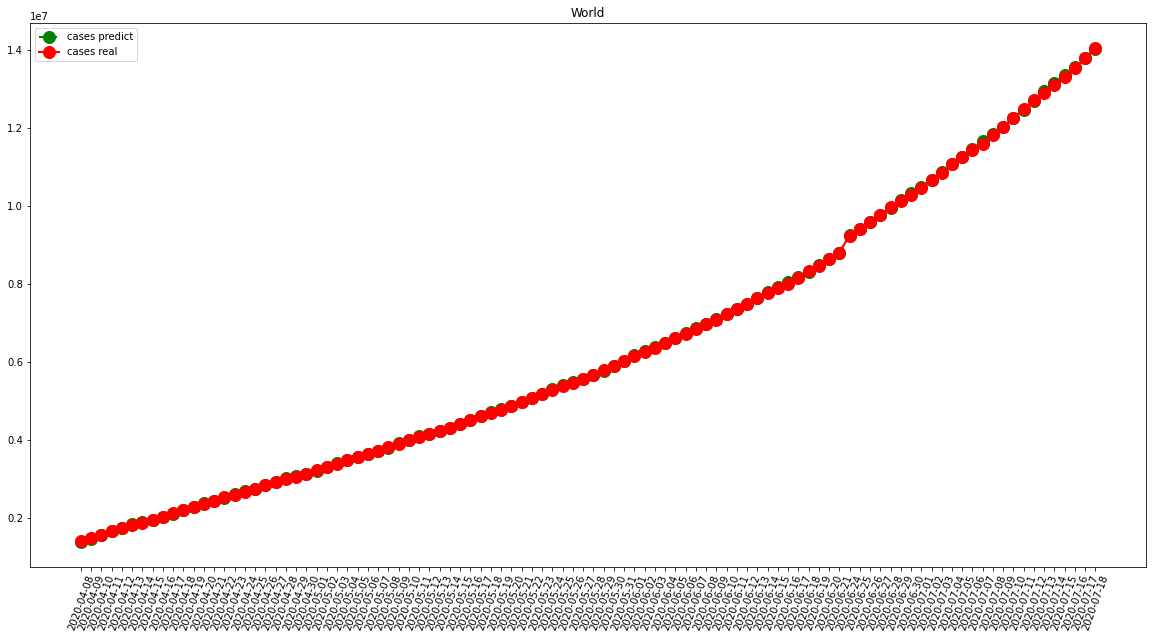

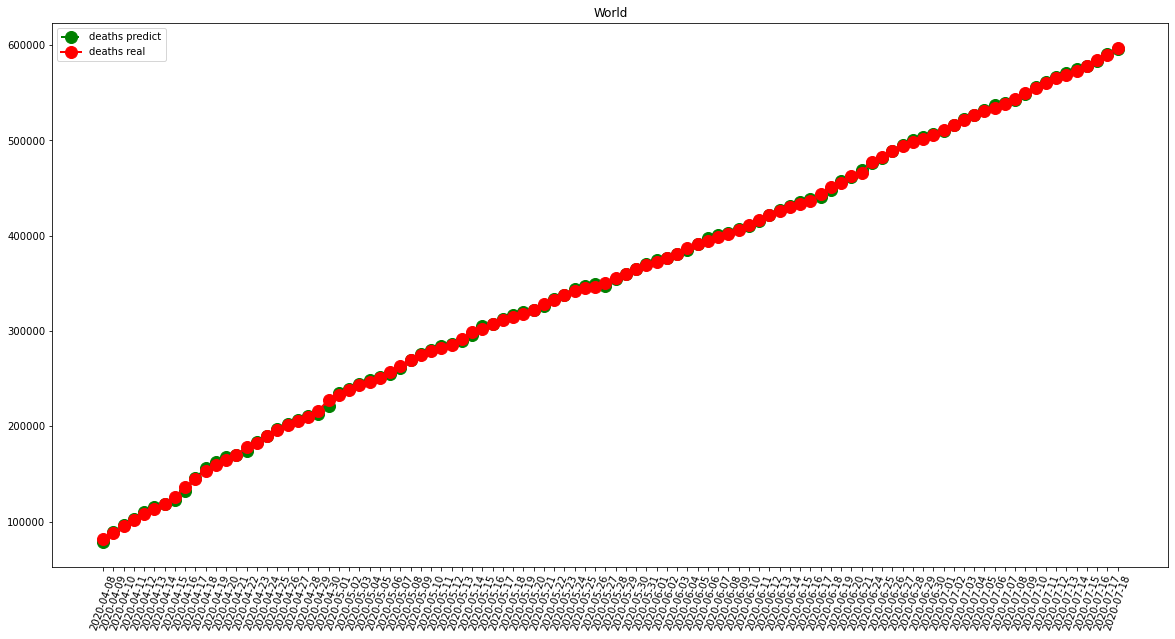

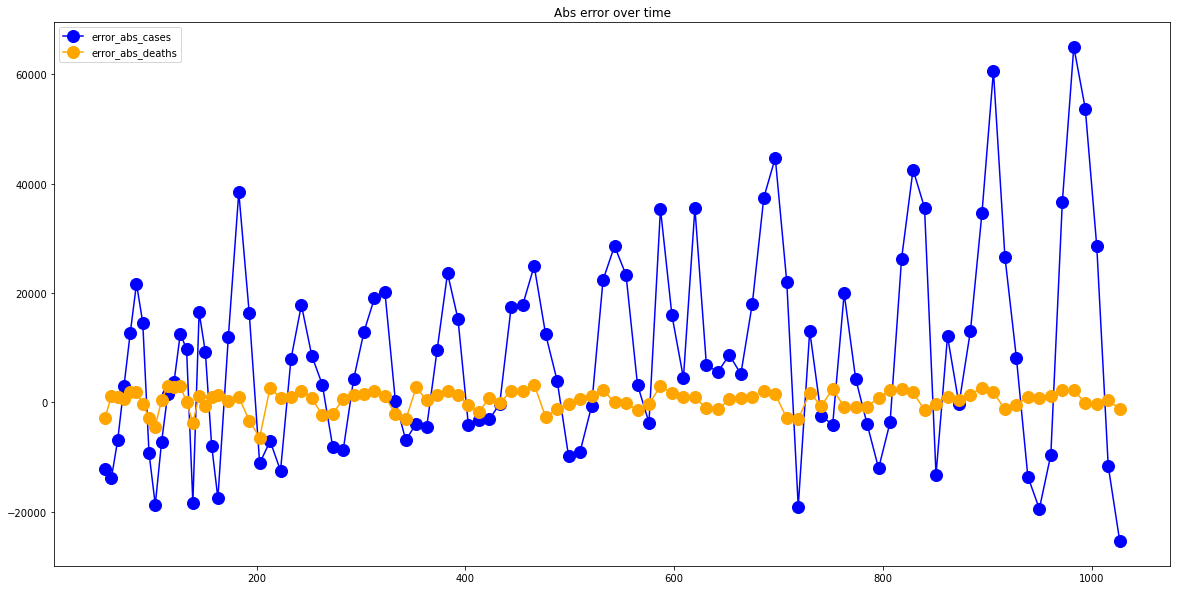

In [7]:
visShow("World")

-- France performances for cases --
MAE =  840.2818181818182
RMSE =  1393.4880141050892
-- France performances for deaths --
MAE =  162.5
RMSE =  319.5076183470719


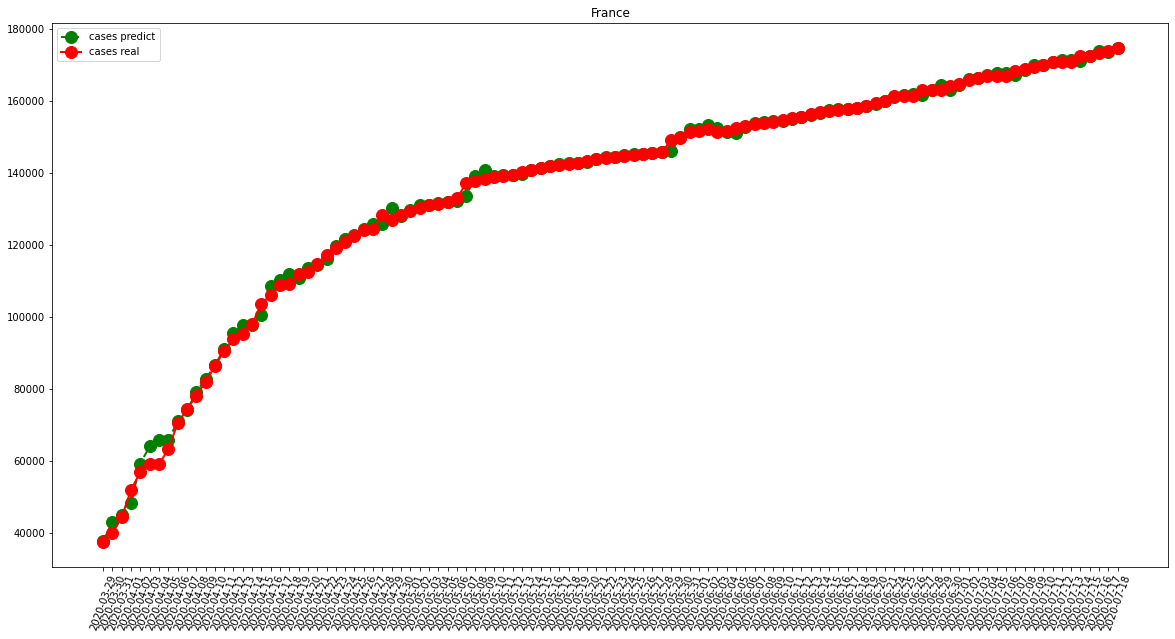

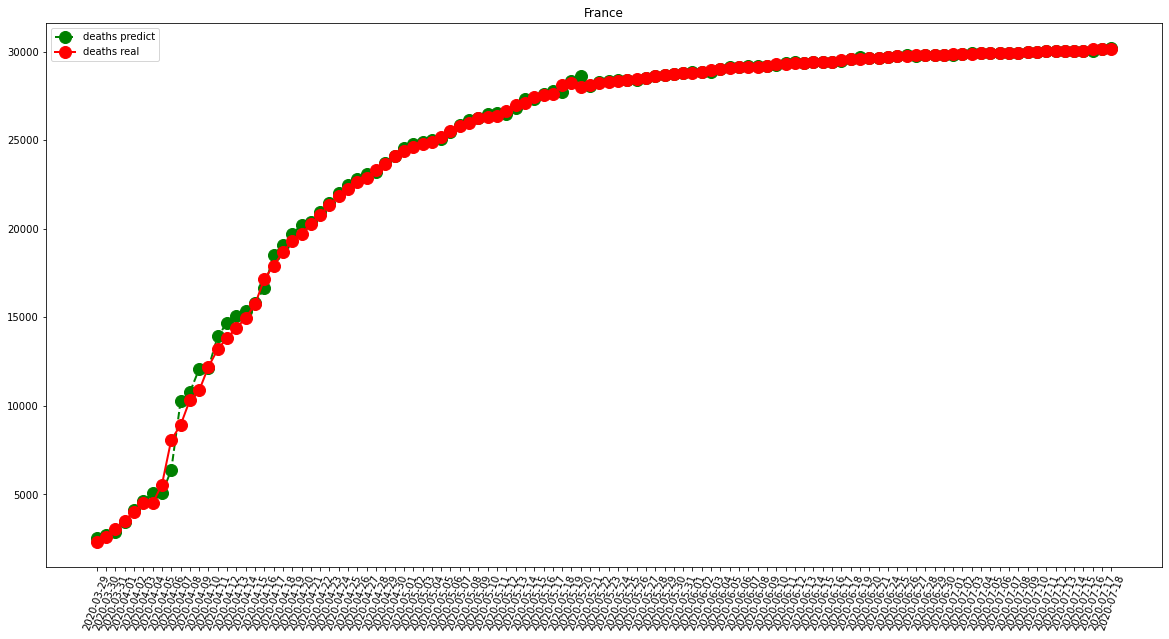

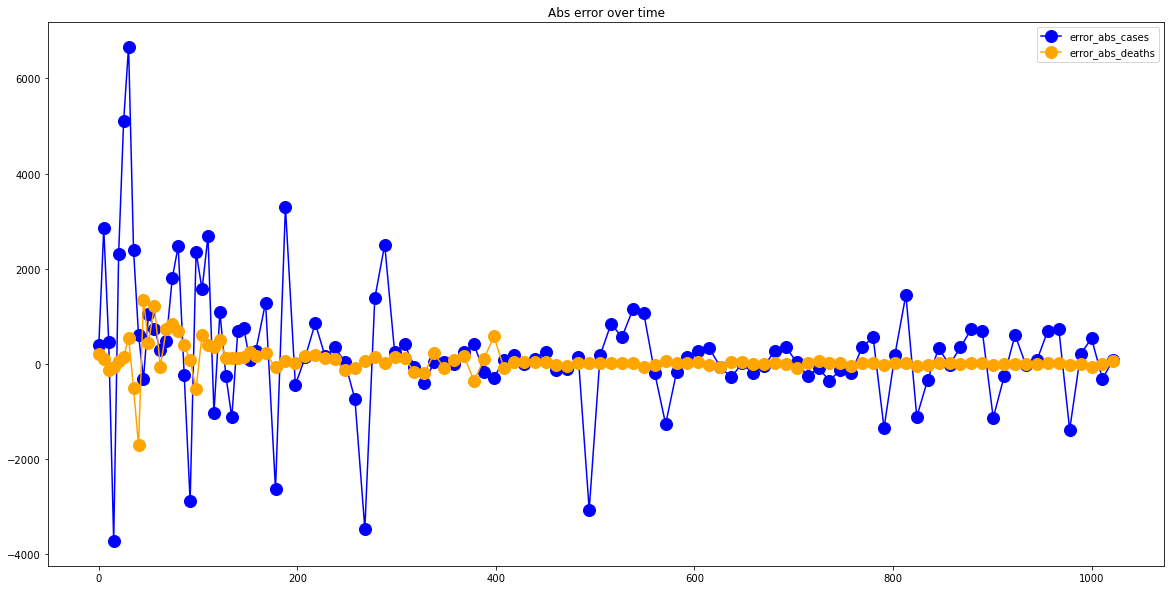

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  349.3090909090909
RMSE =  518.8800527009196
-- Italy performances for deaths --
MAE =  90.7909090909091
RMSE =  282.06938218040676


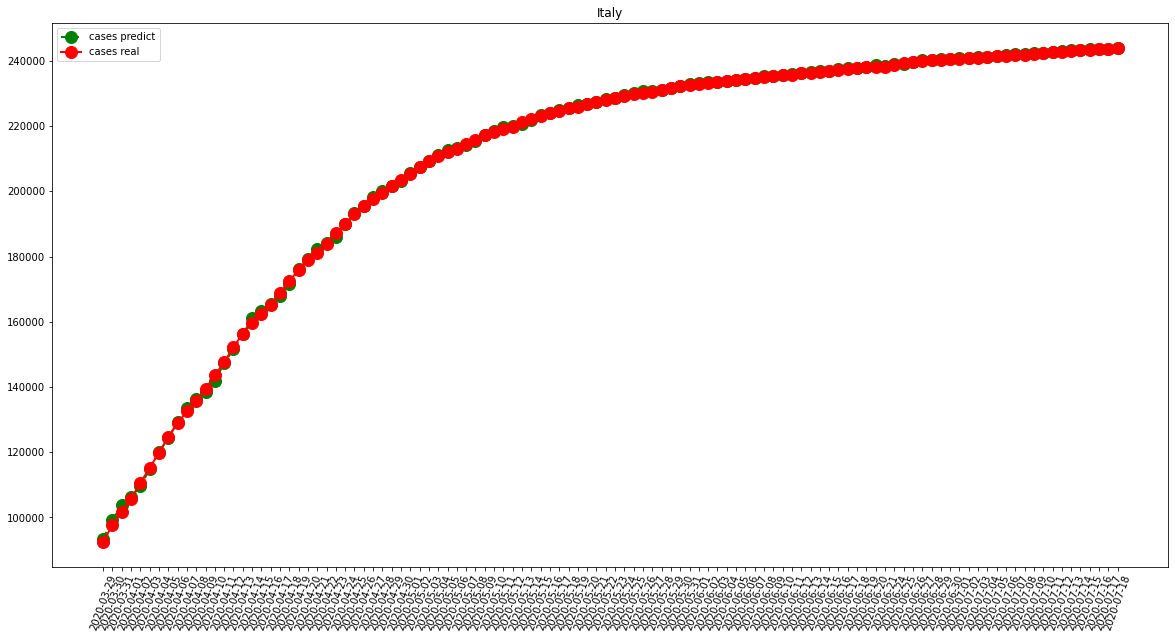

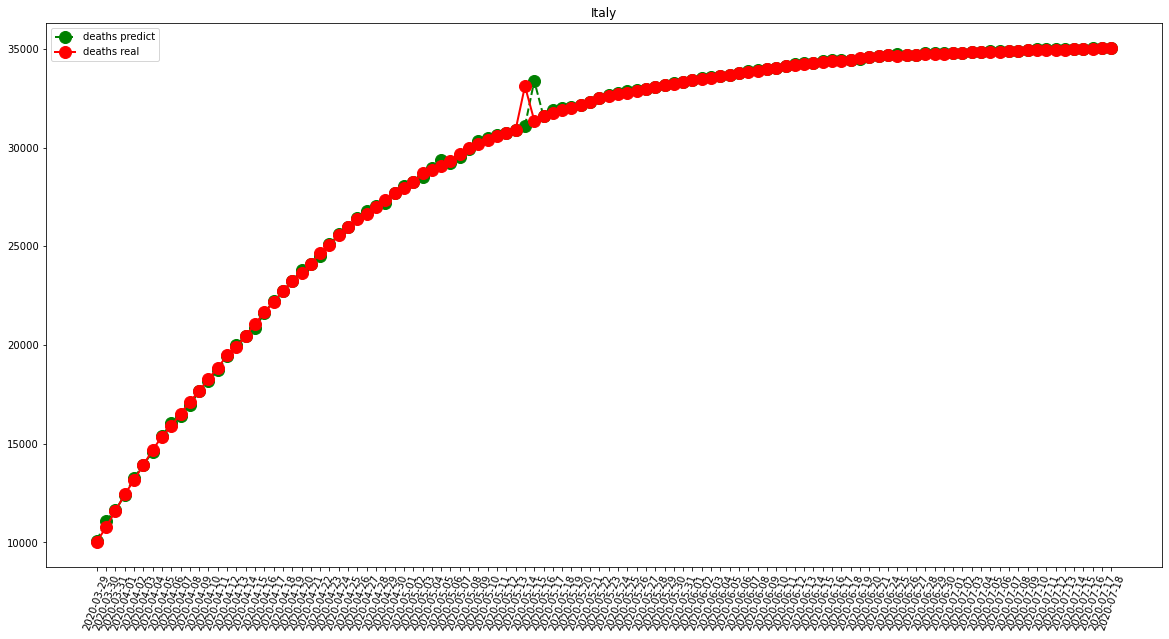

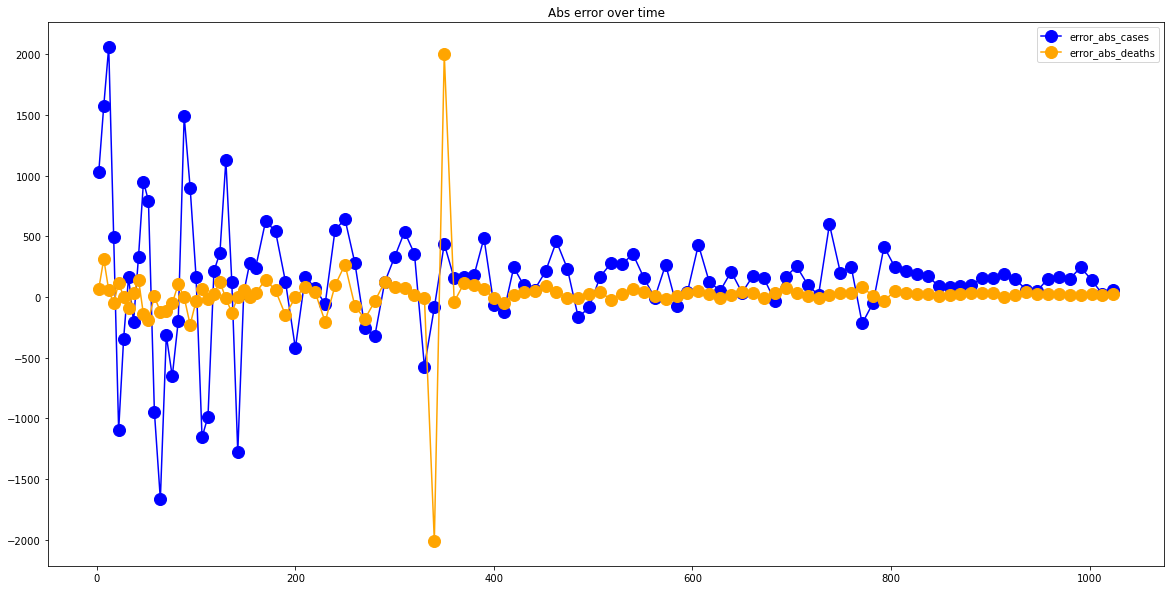

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  844.2545454545455
RMSE =  1971.1505315885486
-- Spain performances for deaths --
MAE =  166.06363636363636
RMSE =  387.0136831031829


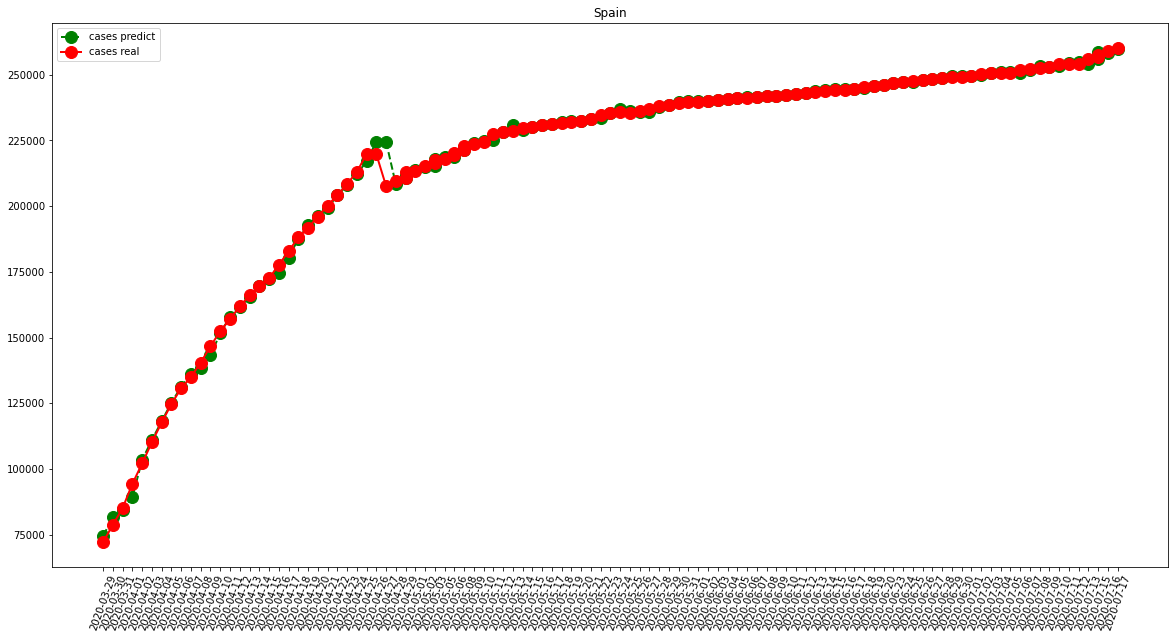

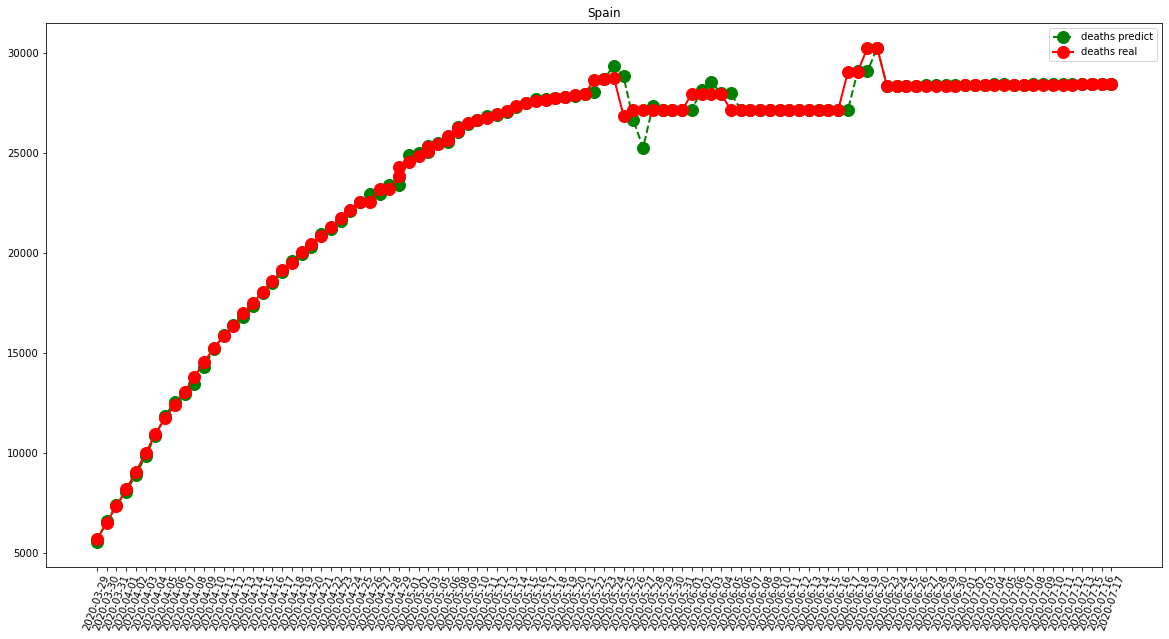

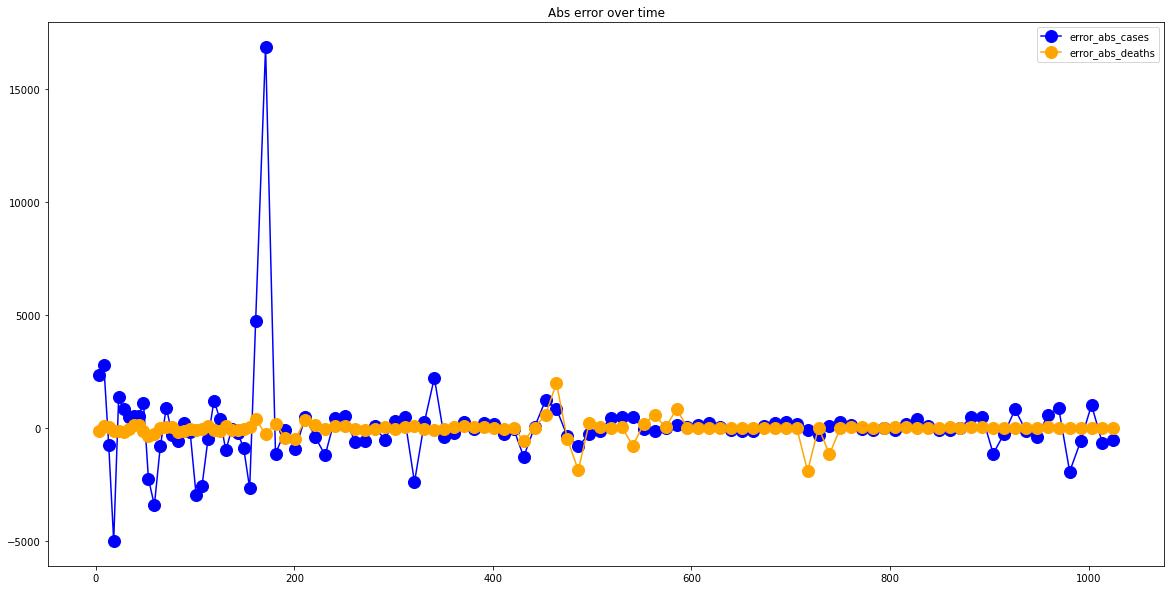

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5542.690909090909
RMSE =  7523.479067075768
-- United States performances for deaths --
MAE =  513.6272727272727
RMSE =  751.6726378853061


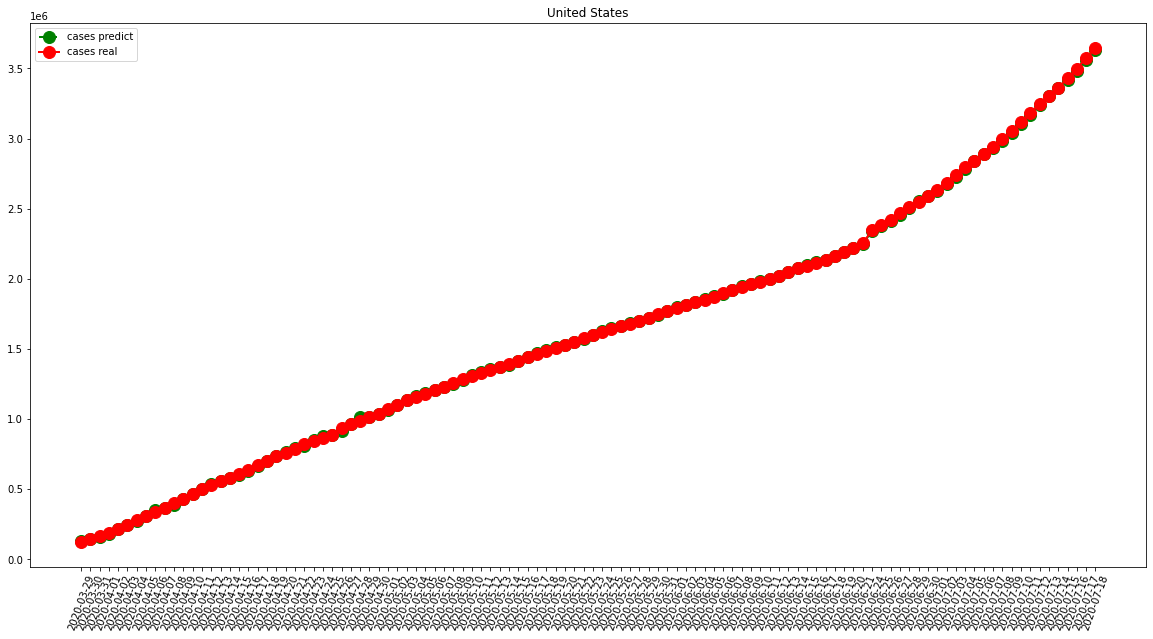

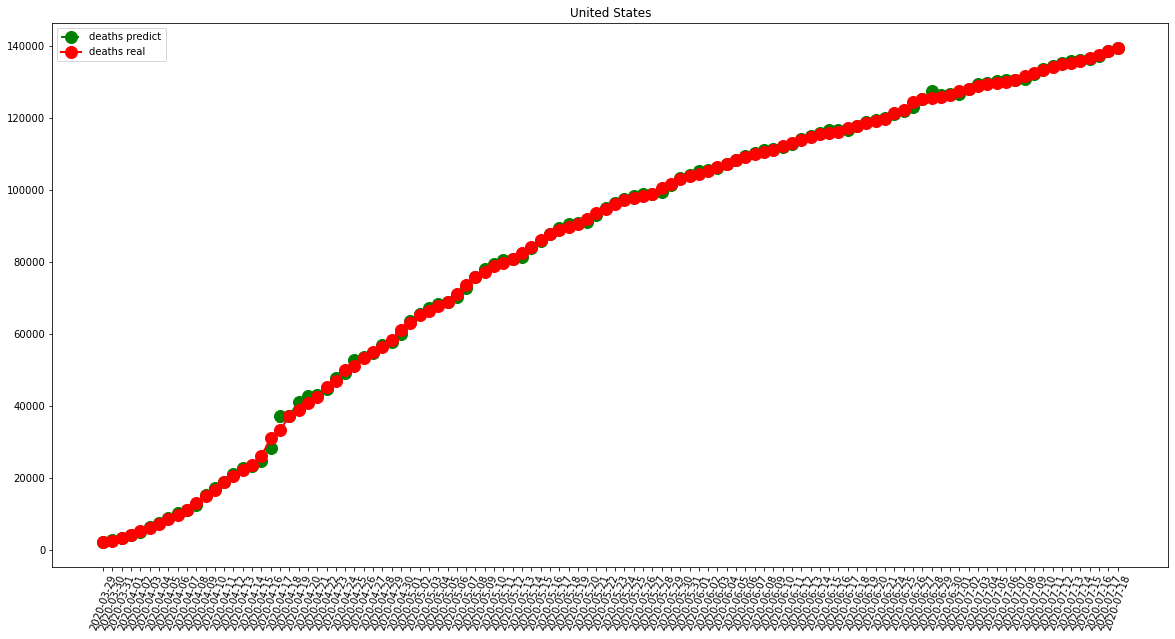

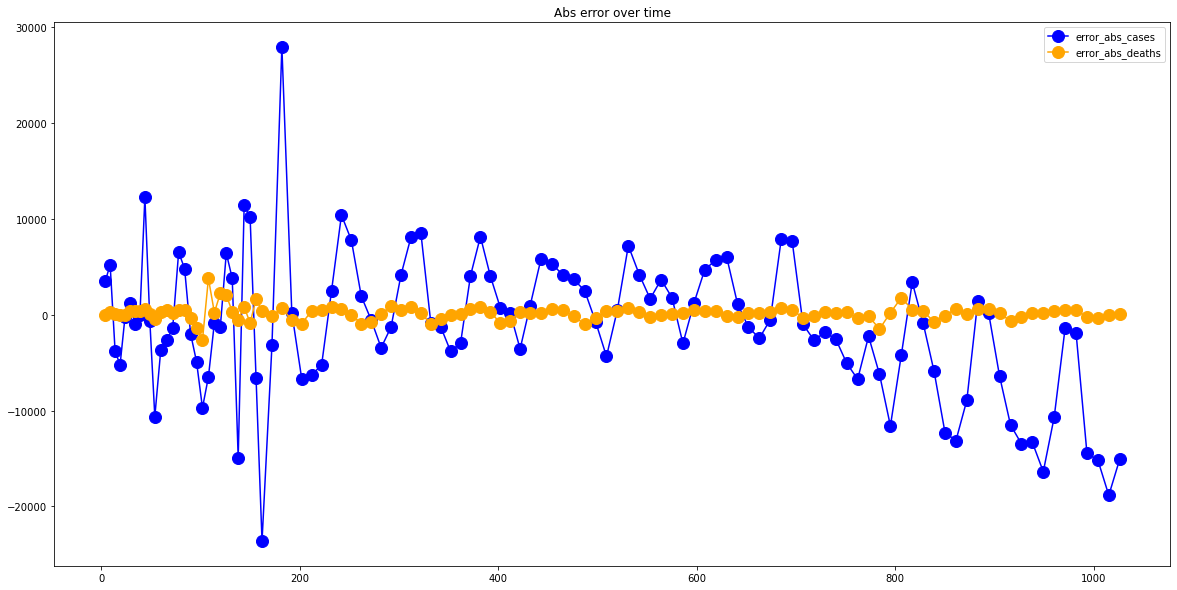

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  83.05454545454545
RMSE =  112.63505025281671
-- China performances for deaths --
MAE =  35.71818181818182
RMSE =  149.66972730892266


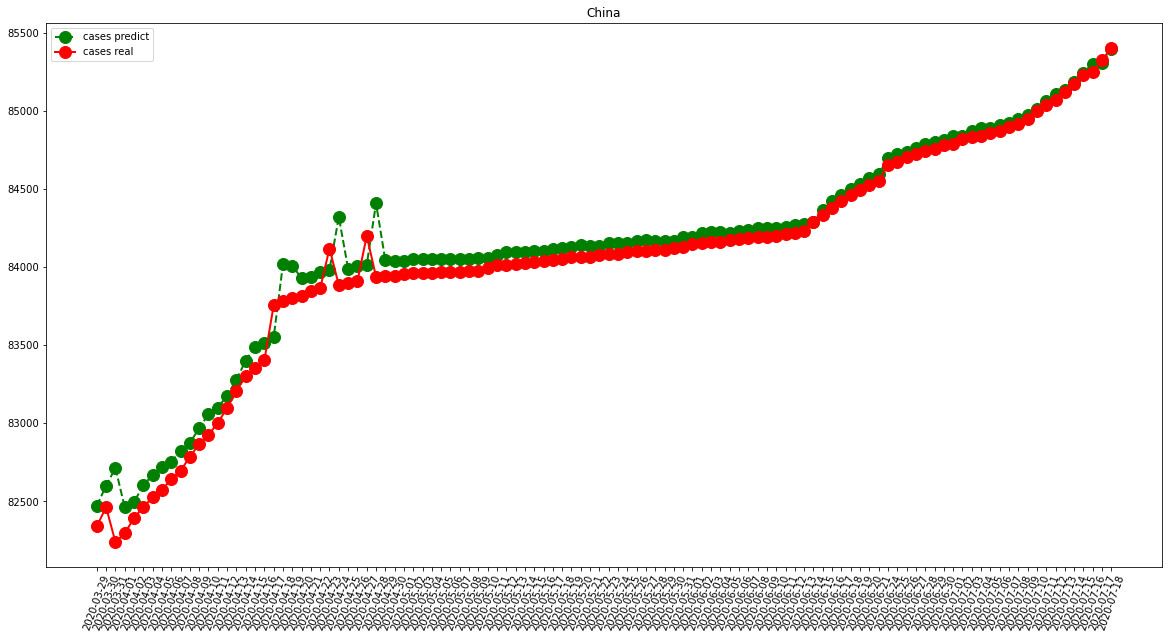

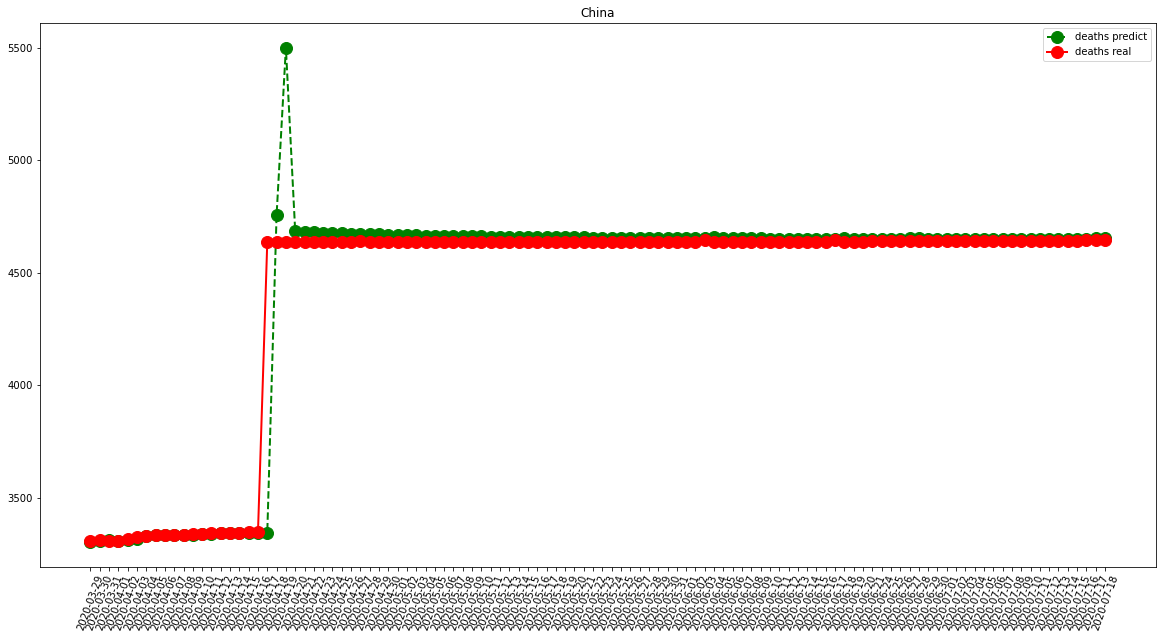

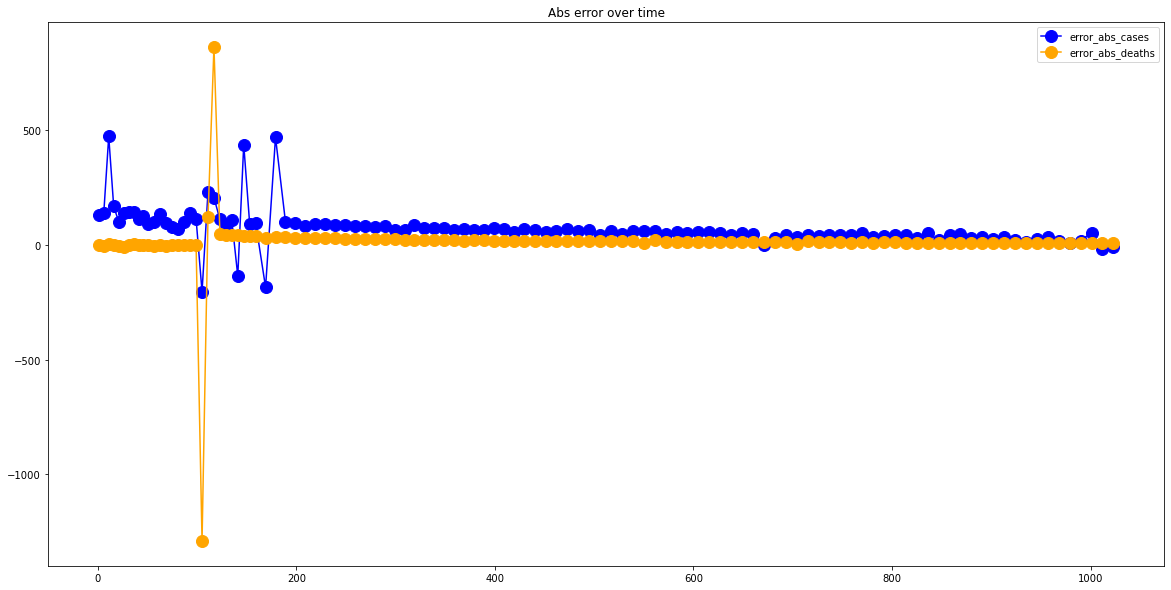

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1446.6097560975609
RMSE =  4607.046805524412
-- United Kingdom performances for deaths --
MAE =  223.0121951219512
RMSE =  541.0275566670988


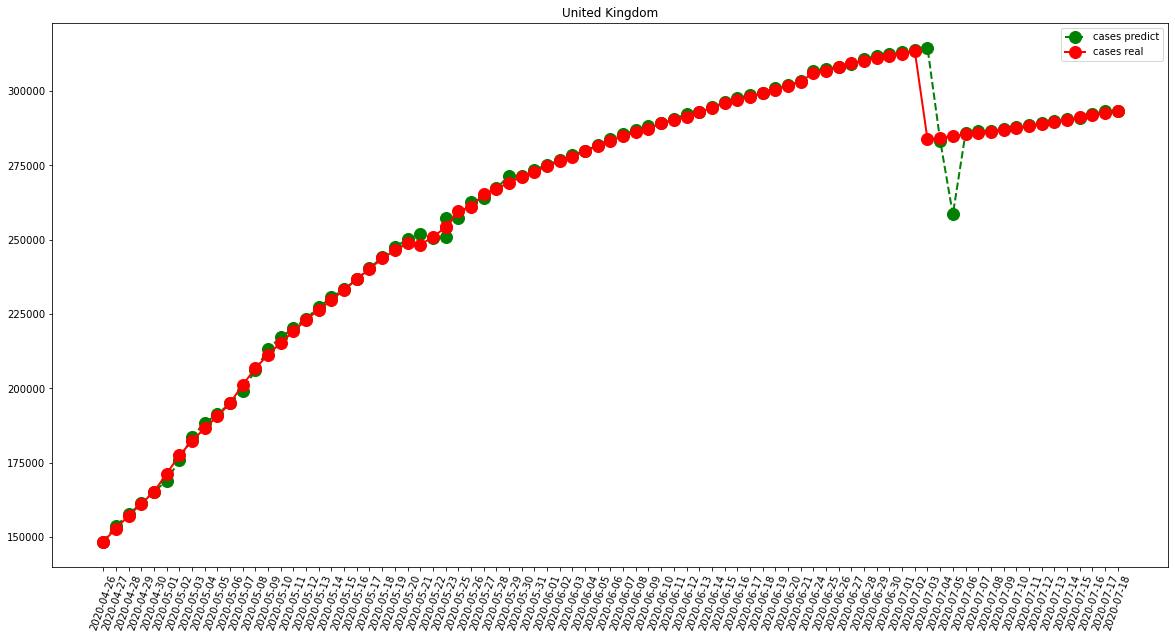

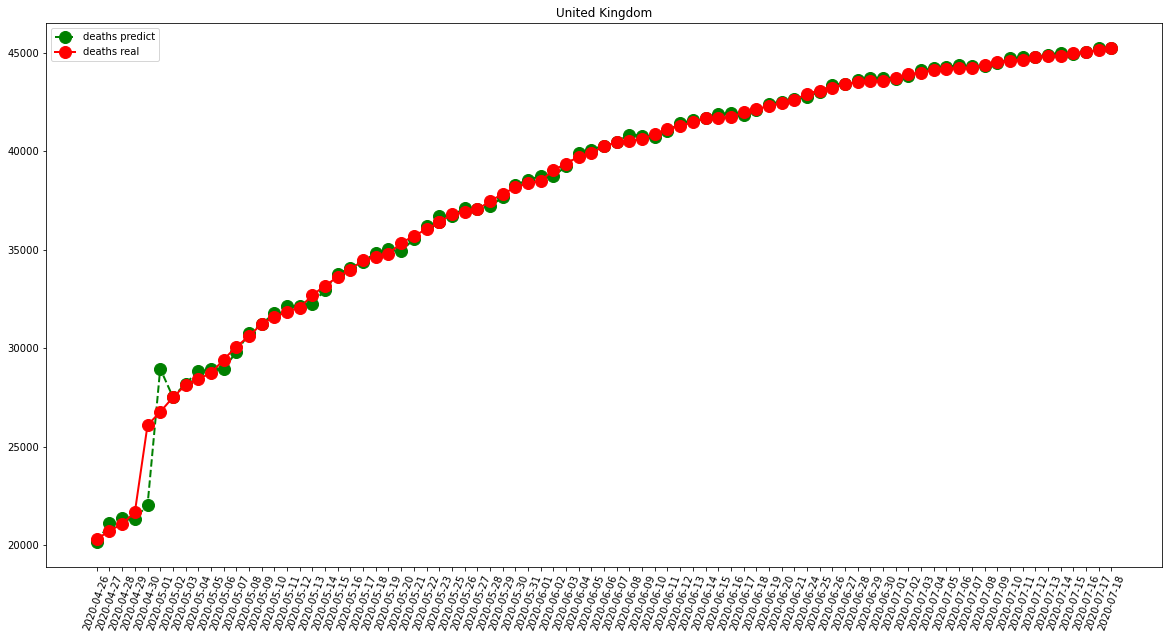

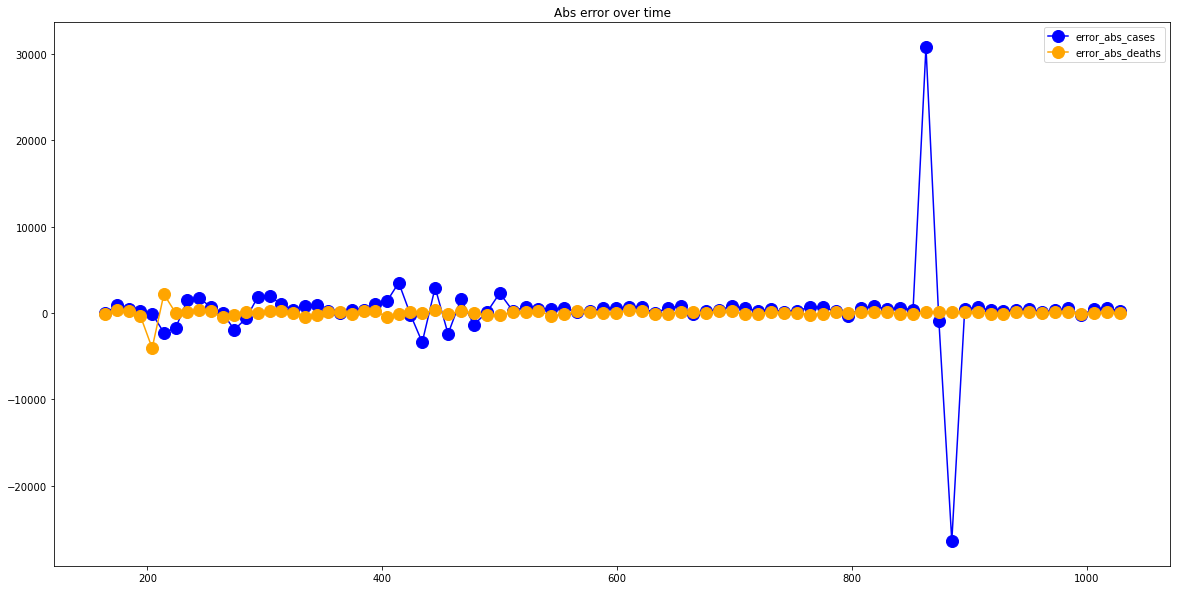

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  297.1219512195122
RMSE =  419.60701707727407
-- Germany performances for deaths --
MAE =  28.365853658536587
RMSE =  48.16258035385421


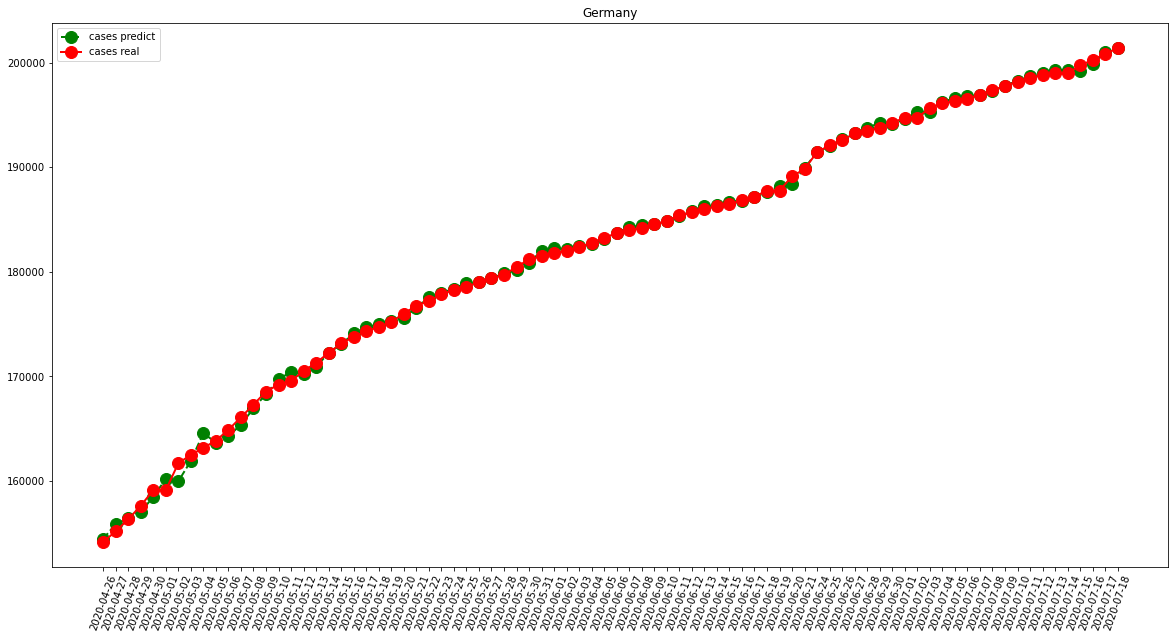

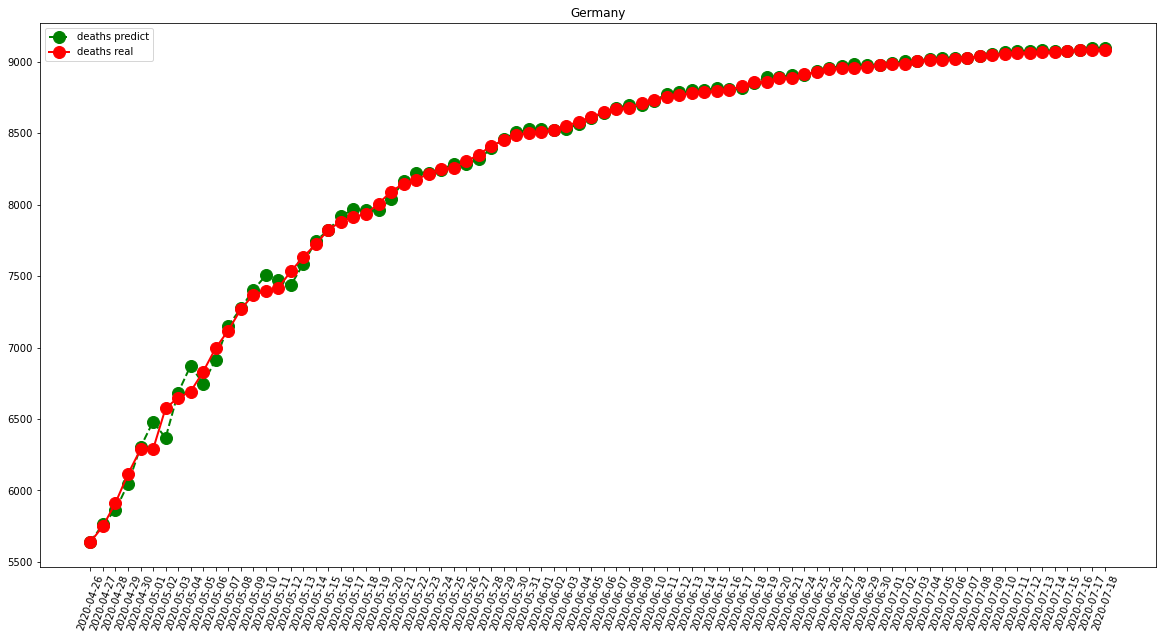

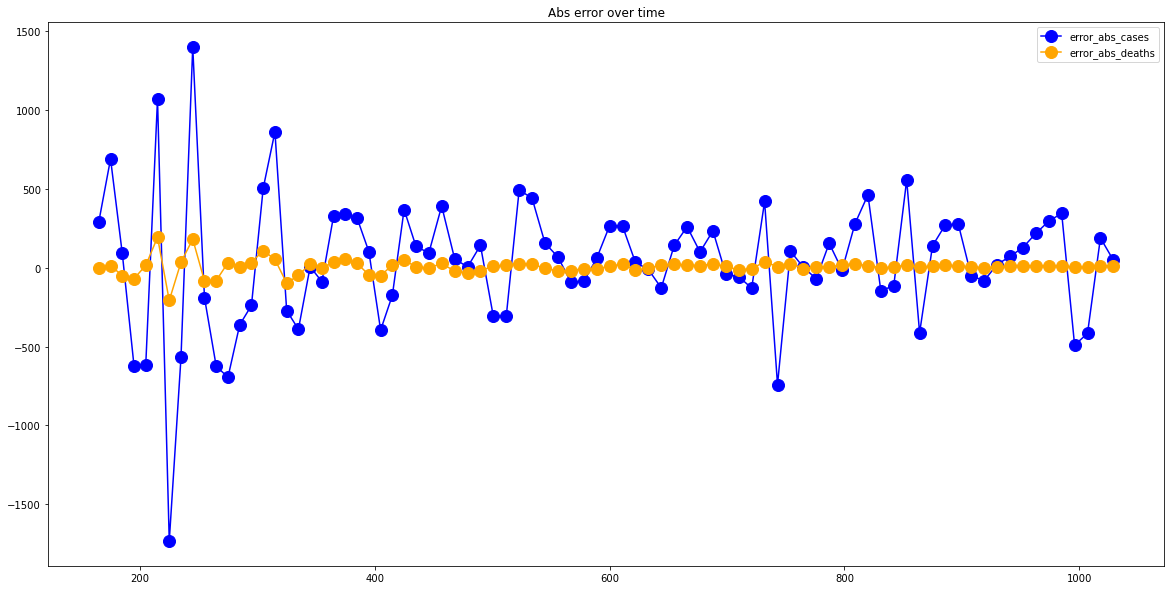

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  378.5853658536585
RMSE =  489.90850315483874
-- Iran performances for deaths --
MAE =  19.036585365853657
RMSE =  29.636620392559657


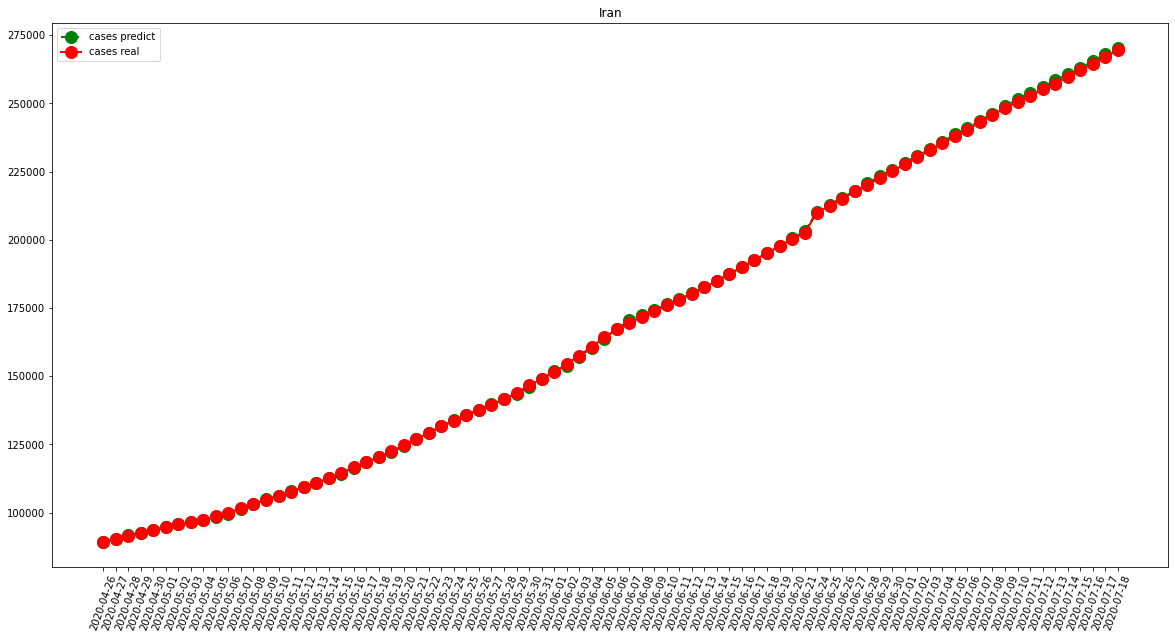

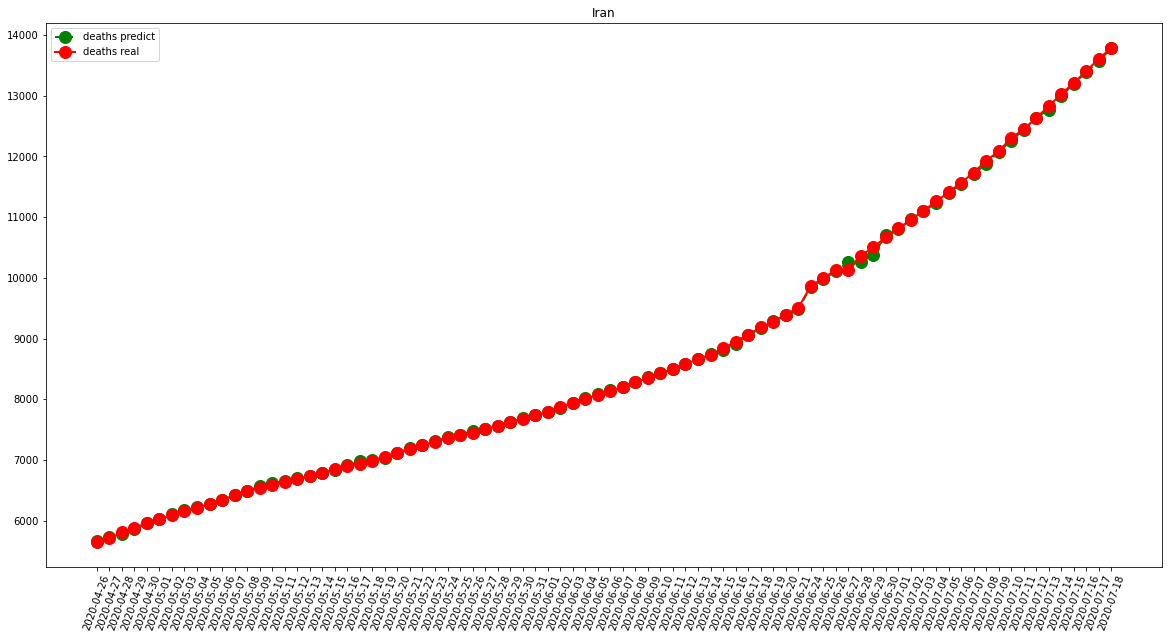

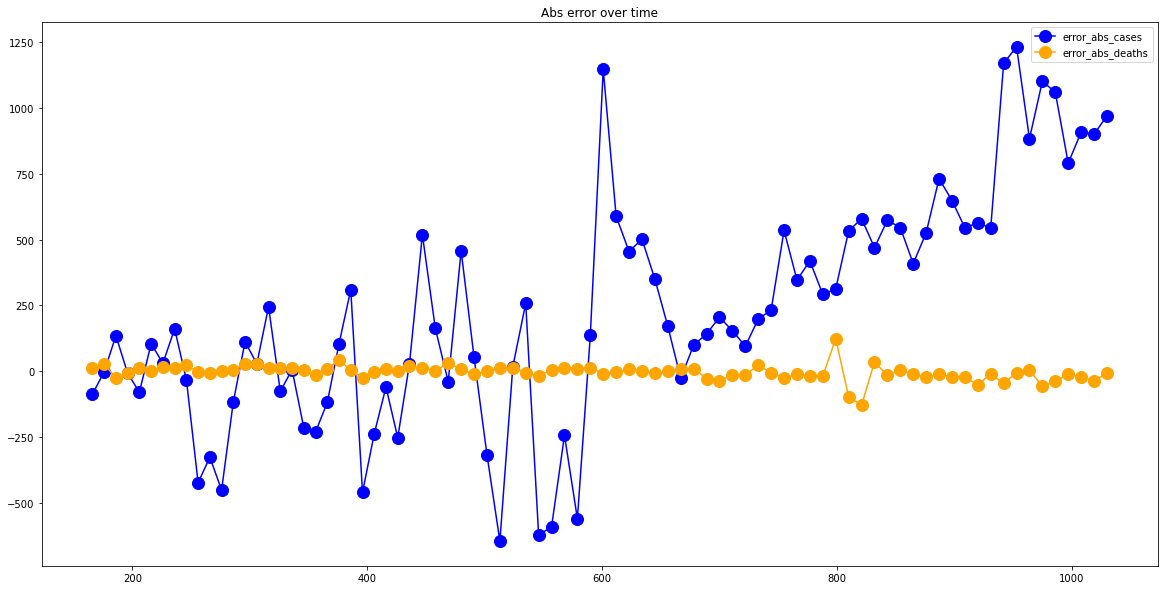

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  230.4390243902439
RMSE =  379.31022119426075
-- Turkey performances for deaths --
MAE =  22.70731707317073
RMSE =  112.09479873053444


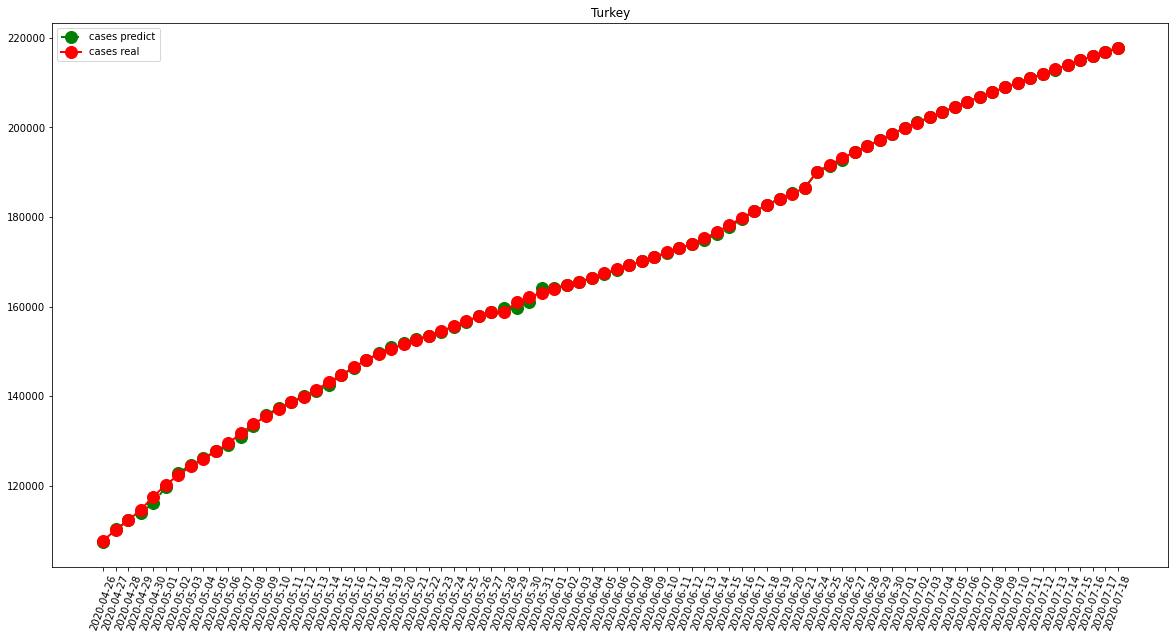

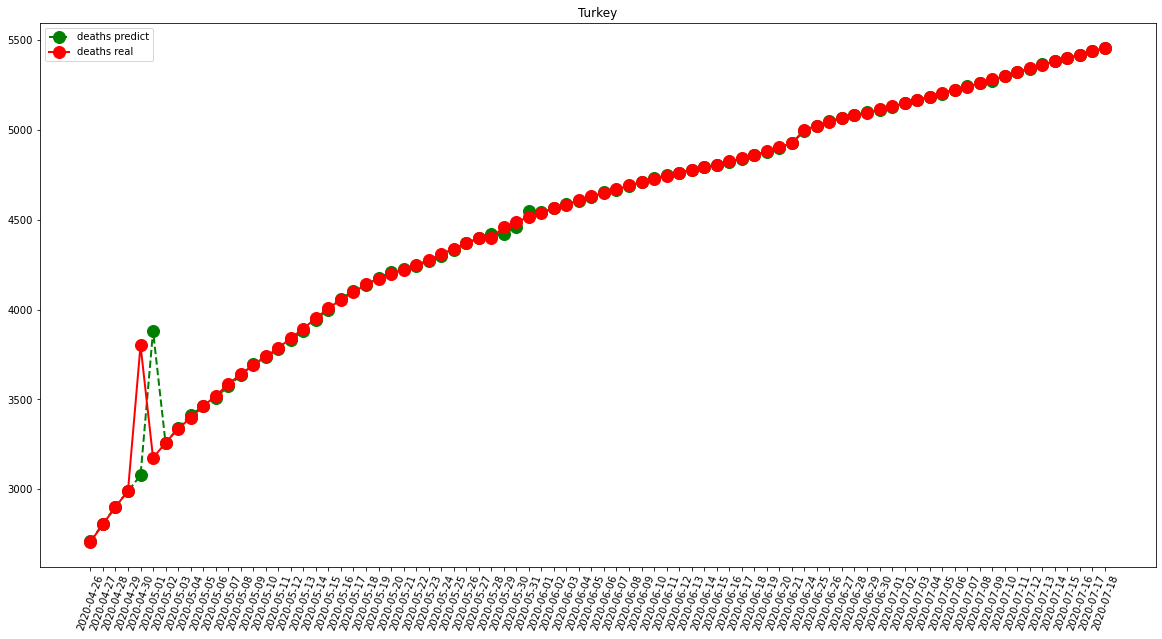

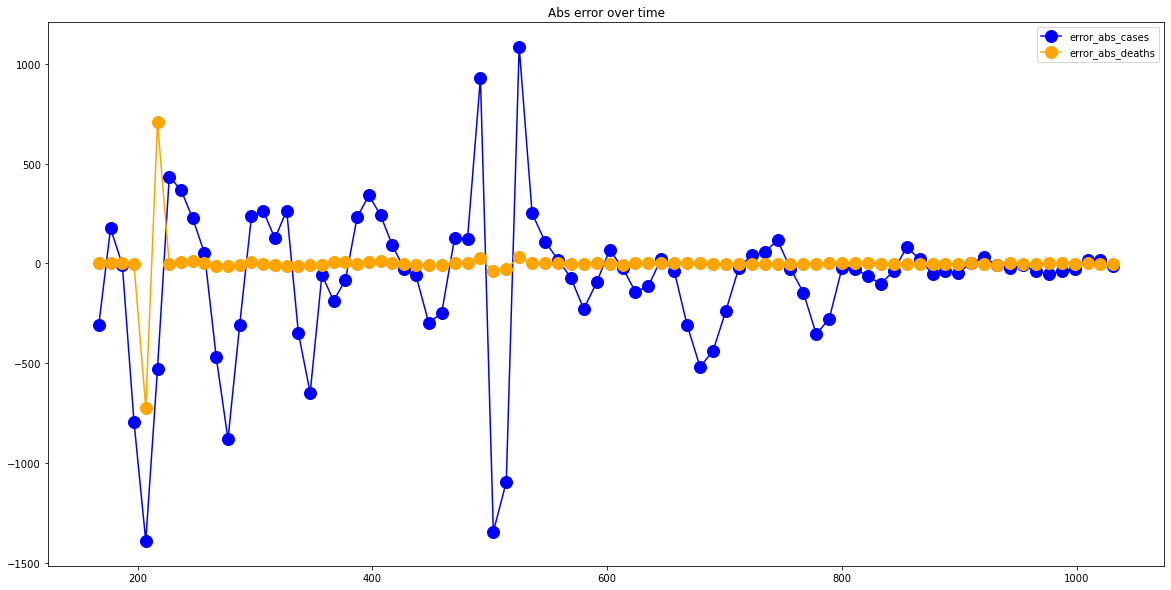

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  9621.272727272728
RMSE =  12673.212312877613
-- Brazil performances for deaths --
MAE =  364.1636363636364
RMSE =  453.0639730064217


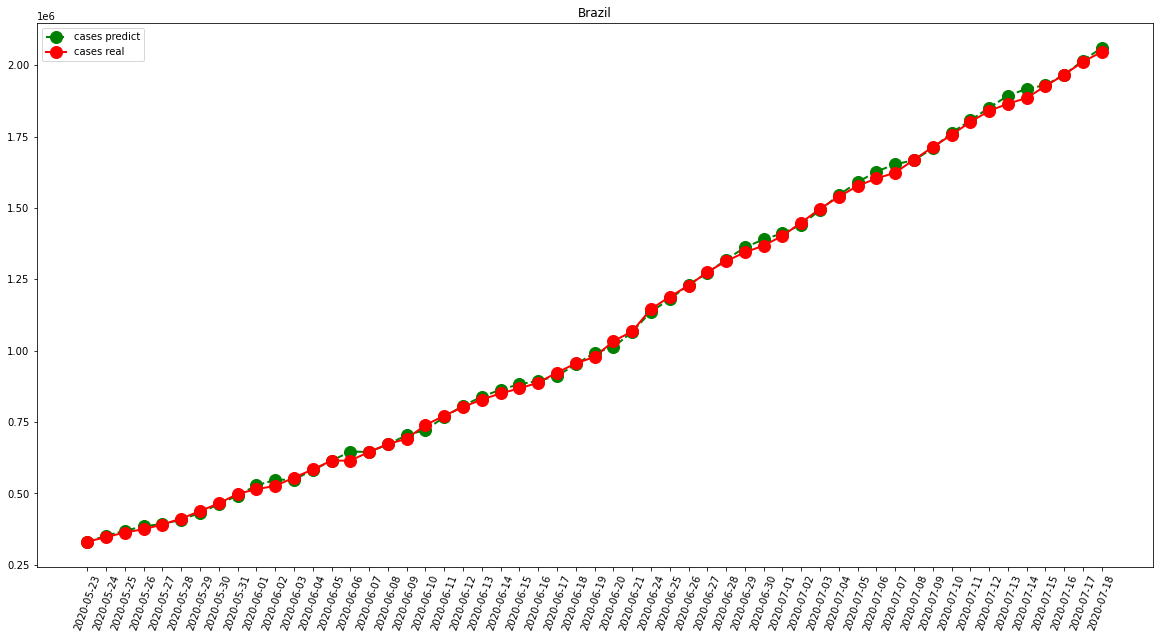

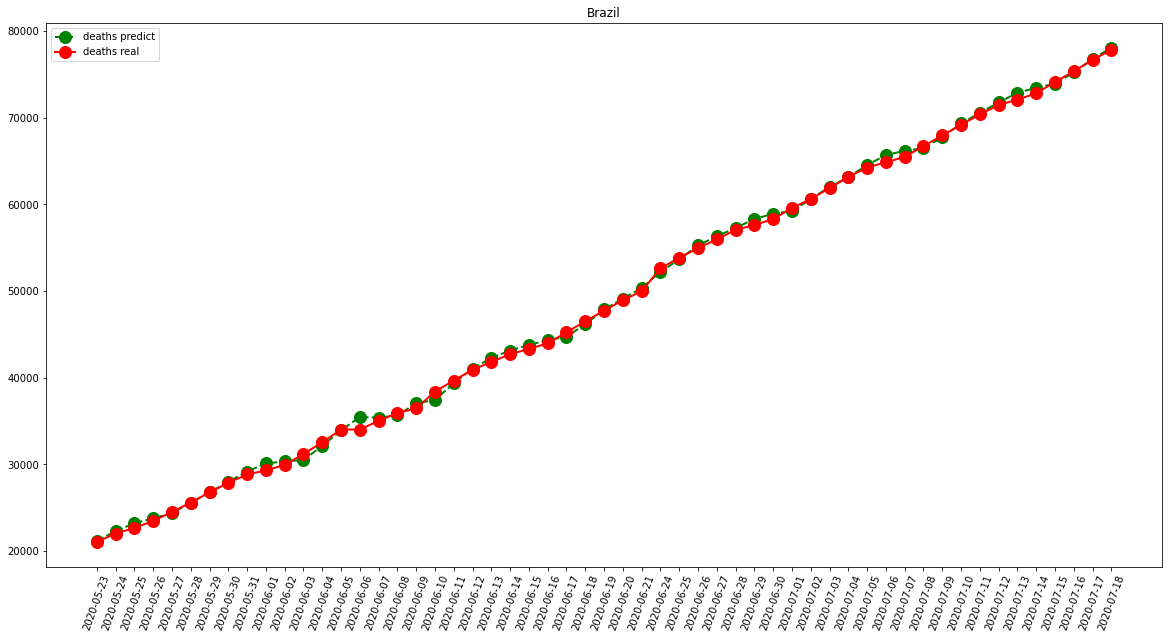

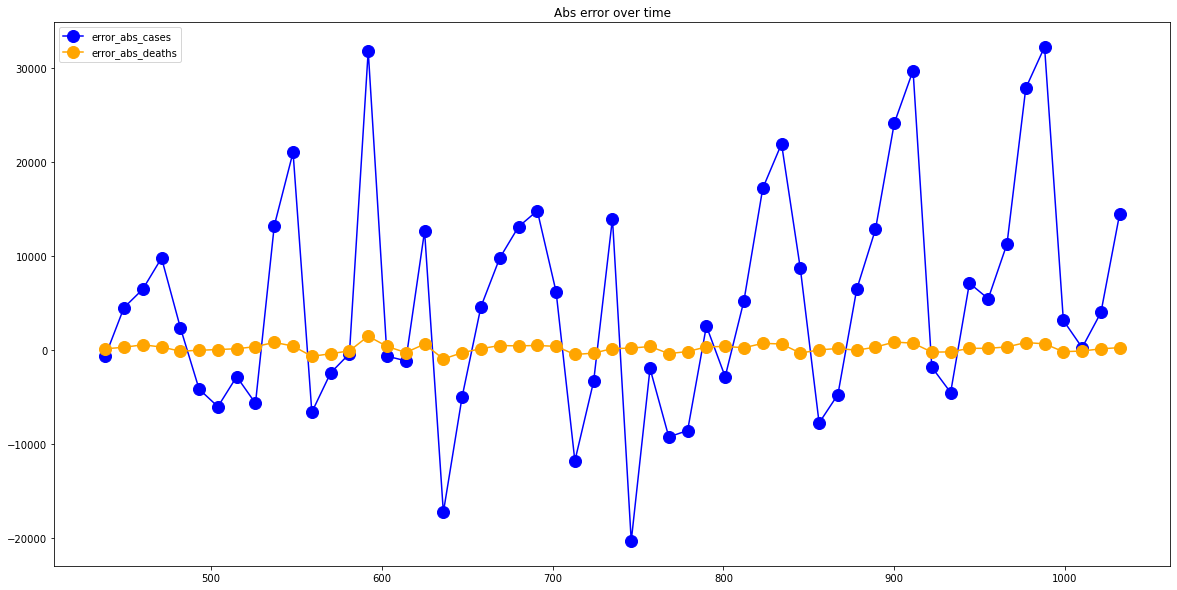

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)